In [1]:
% matplotlib inline

import time
import pandas as pd

from IPython import display as d

import seaborn as sns
sns.set()

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from imblearn.over_sampling import RandomOverSampler

from libs import container
from libs.experiment import (
    WithAnotherExperiment, KFoldExperiment, roc, 
    discretize_classes, clean_features)

In [2]:
data = container.Container(sample=pd.read_pickle("data/sample.pkl"))
data["balanced"] = pd.concat((
    data.sample[data.sample.nbg == 1].sample(786),
    data.sample[data.sample.nbg == 0]))
data["small_sample"] = pd.read_pickle("data/small_sample.pkl")

## Features cleaning

In [3]:
sclasses = {
    "nbg": 1,
    "no-nbg": 0}
sclasses

{'nbg': 1, 'no-nbg': 0}

In [4]:
data.sample.shape, data.balanced.shape, data.small_sample.shape

((12598, 161), (1572, 161), (4352, 161))

In [5]:
X_columns = clean_features(data, "sample")
X_columns = X_columns[
    ~(X_columns.str.contains("Freq2_") | X_columns.str.contains("Freq3_") | X_columns.str.contains("_cnt"))]
print("Total features:", X_columns.size)

Removing [] because null
Removing ['src1_Freq1_harmonics_rel_phase_0', 'src1_Freq2_harmonics_rel_phase_0', 'src1_Freq3_harmonics_rel_phase_0', 'src2_Freq1_harmonics_rel_phase_0', 'src2_Freq2_harmonics_rel_phase_0', 'src2_Freq3_harmonics_rel_phase_0'] because lowvariance
('Total features:', 112)


In [6]:
set(x.split("_", 1)[-1] for x in X_columns)

{'Amplitude',
 'AmplitudeH',
 'AmplitudeJ',
 'AmplitudeJH',
 'AmplitudeJK',
 'Autocor_length',
 'Beyond1Std',
 'CAR_mean',
 'CAR_sigma',
 'CAR_tau',
 'Con',
 'Eta_e',
 'FluxPercentileRatioMid20',
 'FluxPercentileRatioMid35',
 'FluxPercentileRatioMid50',
 'FluxPercentileRatioMid65',
 'FluxPercentileRatioMid80',
 'Freq1_harmonics_amplitude_0',
 'Freq1_harmonics_amplitude_1',
 'Freq1_harmonics_amplitude_2',
 'Freq1_harmonics_amplitude_3',
 'Freq1_harmonics_rel_phase_1',
 'Freq1_harmonics_rel_phase_2',
 'Freq1_harmonics_rel_phase_3',
 'Gskew',
 'LinearTrend',
 'MaxSlope',
 'Mean',
 'Meanvariance',
 'MedianAbsDev',
 'MedianBRP',
 'PairSlopeTrend',
 'PercentAmplitude',
 'PercentDifferenceFluxPercentile',
 'PeriodLS',
 'Period_fit',
 'Psi_CS',
 'Psi_eta',
 'Q31',
 'Rcs',
 'Skew',
 'SmallKurtosis',
 'Std',
 'c89_c3',
 'c89_hk_color',
 'c89_jh_color',
 'c89_jk_color',
 'c89_m2',
 'c89_m4',
 'n09_c3',
 'n09_hk_color',
 'n09_jh_color',
 'n09_jk_color',
 'n09_m2',
 'n09_m4',
 'ppmb'}

## SVM - Linear

In [7]:
%%time
svc_linear = KFoldExperiment(
    clf=SVC(kernel='linear', probability=True), clsnum=sclasses,
    data=data, pcls="nbg", ncls="no-nbg", sampler=RandomOverSampler(),
    X_columns=X_columns, y_column="nbg")("small_sample", nfolds=10)

[PVXhtEgxeXST6fBuFnr86j-2018-10-16 16:55:41.515082] Launching
[jBmp7Garpwo5aKaY3jqUJi-2018-10-16 16:55:41.694096] Launching
[sekBwJFWMwerA7dxRo9qSH-2018-10-16 16:55:41.894129] Launching
[F9KfZxwAFUqa4JvgTcoK9X-2018-10-16 16:55:42.101660] Launching
[XgrL7saXFFZq4X4RKVX63W-2018-10-16 16:55:42.329270] Launching
[AZGvuwW5prcs4Ho6cDCp3f-2018-10-16 16:55:42.535686] Launching
[bwxutp9qCD2h6EqRtz2G8X-2018-10-16 16:55:42.767038] Launching
[Z9iso7JmNge8Si3NkopvaG-2018-10-16 16:55:42.982487] Launching
[4byGHQrsLzZJuATcxNhp7A-2018-10-16 16:55:43.213522] Launching
[faDT9E5w7gXgqnxQ9RP9HK-2018-10-16 16:55:43.426418] Launching
[XgrL7saXFFZq4X4RKVX63W-2018-10-16 17:01:31.416581] Done
[jBmp7Garpwo5aKaY3jqUJi-2018-10-16 17:01:49.540149] Done
[Z9iso7JmNge8Si3NkopvaG-2018-10-16 17:02:09.051483] Done
[sekBwJFWMwerA7dxRo9qSH-2018-10-16 17:02:30.707921] Done
[F9KfZxwAFUqa4JvgTcoK9X-2018-10-16 17:02:46.297793] Done
[PVXhtEgxeXST6fBuFnr86j-2018-10-16 17:03:08.030725] Done
[4byGHQrsLzZJuATcxNhp7A-2018-10-16 17:

## SVM - Poly

In [8]:
%%time
svc_poly = KFoldExperiment(
    clf=SVC(kernel='poly', probability=True), clsnum=sclasses,
    data=data, pcls="nbg", ncls="no-nbg", sampler=RandomOverSampler(),
    X_columns=X_columns, y_column="nbg")("small_sample", nfolds=10)

[Rco9Xm6mzKe5rf4eJ4uV38-2018-10-16 17:04:36.894120] Launching
[QFxpSWMDrDyxjeSxFah6aX-2018-10-16 17:04:37.060669] Launching
[PN65SKmeyieES8feSWJVQS-2018-10-16 17:04:37.270935] Launching
[HSJdK9dCpsJU6yyGiWzXXb-2018-10-16 17:04:37.408427] Launching
[hn9utaD77Z2yddPe9r78C3-2018-10-16 17:04:37.590579] Launching
[zrCTZJbvG5Mjo4ZYsNvCK7-2018-10-16 17:04:37.785596] Launching
[qw9G8qWnn9teMUMqCGzXe2-2018-10-16 17:04:37.953839] Launching
[U3wm3n9oFJWBLQYocK7AHk-2018-10-16 17:04:38.175115] Launching
[cxqvBm5CauycuqGBssHtVf-2018-10-16 17:04:38.417932] Launching
[LbxjUTiUq4idimb3fYLDe2-2018-10-16 17:04:38.621010] Launching
[U3wm3n9oFJWBLQYocK7AHk-2018-10-16 17:06:01.623979] Done
[zrCTZJbvG5Mjo4ZYsNvCK7-2018-10-16 17:06:09.743167] Done
[cxqvBm5CauycuqGBssHtVf-2018-10-16 17:06:12.579061] Done
[PN65SKmeyieES8feSWJVQS-2018-10-16 17:06:32.103426] Done
[Rco9Xm6mzKe5rf4eJ4uV38-2018-10-16 17:06:46.051849] Done
[LbxjUTiUq4idimb3fYLDe2-2018-10-16 17:07:12.526947] Done
[QFxpSWMDrDyxjeSxFah6aX-2018-10-16 17:

## Random Forest

In [9]:
%%time
rf = KFoldExperiment(
    clf=RandomForestClassifier(n_estimators=500, criterion="entropy"), clsnum=sclasses, sampler=RandomOverSampler(),
    data=data, pcls="nbg", ncls="no-nbg", X_columns=X_columns, y_column="nbg")("small_sample", nfolds=10)

[tLqZjXGQm3pTdNuEDtTRkZ-2018-10-16 17:08:38.092680] Launching
[HNJzVJbzn8Ag8ZHkTwksh5-2018-10-16 17:08:38.249217] Launching
[UqbL8cFALRaCwqA8GwfGNe-2018-10-16 17:08:38.413008] Launching
[v4wQQSTnmBg2kQ4BdXp2E8-2018-10-16 17:08:38.572878] Launching
[Weo7UbfyUZQfPWWRr8cCo3-2018-10-16 17:08:38.725961] Launching
[cf7DQ8e6uKcRCAMKkJhwrS-2018-10-16 17:08:38.888191] Launching
[SHDzNwdHayXXb8J2mw5wya-2018-10-16 17:08:39.038846] Launching
[nik2UomMCtjsp3urVif8bL-2018-10-16 17:08:39.190469] Launching
[pFzpLuVZp2Vsoqkkfe7jLA-2018-10-16 17:08:39.346497] Launching
[swY2iHod5a45rmS7zD354H-2018-10-16 17:08:39.492794] Launching
[cf7DQ8e6uKcRCAMKkJhwrS-2018-10-16 17:09:45.618427] Done
[SHDzNwdHayXXb8J2mw5wya-2018-10-16 17:09:45.686285] Done
[swY2iHod5a45rmS7zD354H-2018-10-16 17:09:45.710354] Done
[nik2UomMCtjsp3urVif8bL-2018-10-16 17:09:46.081012] Done
[tLqZjXGQm3pTdNuEDtTRkZ-2018-10-16 17:09:46.119980] Done
[pFzpLuVZp2Vsoqkkfe7jLA-2018-10-16 17:09:47.604224] Done
[UqbL8cFALRaCwqA8GwfGNe-2018-10-16 17:

## KNN

In [10]:
%%time
knn = KFoldExperiment(
    clf=KNeighborsClassifier(n_neighbors=50, weights='distance'), clsnum=sclasses, sampler=RandomOverSampler(),
    data=data, pcls="nbg", ncls="no-nbg", X_columns=X_columns, y_column="nbg")("small_sample", nfolds=10)

[ziaYbMwbS6niKCeRK8Az48-2018-10-16 17:09:52.562802] Launching
[YdrnKnNEx9foT7ormbBdji-2018-10-16 17:09:52.714357] Launching
[taKznHpLNeMAZet7tqdtbH-2018-10-16 17:09:52.866748] Launching
[gaVZkdzDwagz2aiXvypaf9-2018-10-16 17:09:53.019987] Launching
[J2GL3jgA5J7SzP88YzCACA-2018-10-16 17:09:53.234029] Launching
[kT2pnXDJHJRpPRATKtapNX-2018-10-16 17:09:53.404692] Launching
[uhtifHChu2B2EojUeFR3CR-2018-10-16 17:09:53.598677] Launching
[wXF94mCrL4XbUz99Czn37e-2018-10-16 17:09:53.795026] Launching
[DBZSsNg3MaDBMoujmqyFea-2018-10-16 17:09:54.015962] Launching
[ha72mE4hGRr3dMvkUyvz6Z-2018-10-16 17:09:54.195003] Launching
[ziaYbMwbS6niKCeRK8Az48-2018-10-16 17:09:56.755207] Done
[YdrnKnNEx9foT7ormbBdji-2018-10-16 17:09:56.982061] Done
[taKznHpLNeMAZet7tqdtbH-2018-10-16 17:09:57.320917] Done
[kT2pnXDJHJRpPRATKtapNX-2018-10-16 17:09:57.771496] Done
[gaVZkdzDwagz2aiXvypaf9-2018-10-16 17:09:57.972480] Done
[J2GL3jgA5J7SzP88YzCACA-2018-10-16 17:09:58.116822] Done
[uhtifHChu2B2EojUeFR3CR-2018-10-16 17:

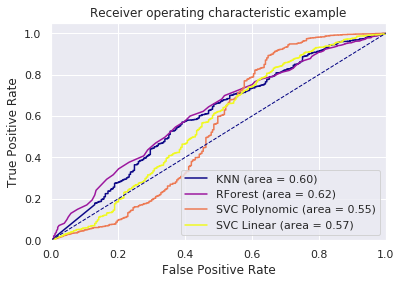

In [11]:
roc({"KNN": knn, "RForest": rf, 
     "SVC Linear": svc_linear,
     "SVC Polynomic": svc_poly})